In [1]:
import pandas as pd
import librosa
from pydub import AudioSegment
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [42]:
DF_selected = pd.read_csv('./dataset/birds_spain_selected.csv')

In [3]:
audio = AudioSegment.from_mp3('./dataset/recordings/stage-1/Corvus-corax_308884.mp3')

In [4]:
audio

In [9]:
from pydub.utils import mediainfo
info = mediainfo("./dataset/recordings/stage-1/Corvus-corax_308884.mp3")
print(info['sample_rate'])
print(info['channels'])

44100
2


In [10]:
audio = audio.set_frame_rate(16000)

In [12]:
samples = audio.get_array_of_samples()

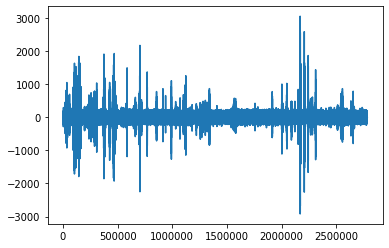

In [13]:
plt.plot(samples)

In [15]:
audio.export('prueba.mp3', format='mp3')

<_io.BufferedRandom name='prueba.mp3'>

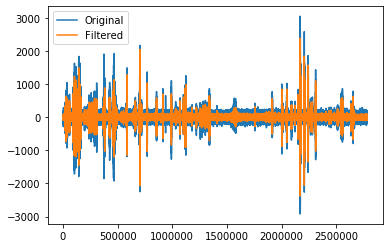

In [38]:
from scipy import signal
# Define filter cutoff frequency and degree
b, a = signal.butter(3, 1/8, btype= 'low')
# Apply modeled filter to data
samples_filtered = signal.filtfilt(b, a, samples)
plt.plot(samples)
plt.plot(samples_filtered)
plt.legend(["Original","Filtered"])

In [39]:
import array
new_sample = array.array('h')
new_sample.fromlist(list(map(int,(samples_filtered*2))))
new_audio = audio._spawn(data=new_sample)

In [34]:
audio

In [40]:
new_audio

In [111]:
extract = audio[:5000]

In [ ]:
extract
# extract.export( file_name+'-extract.mp3', format="mp3")

In [20]:
y, rate = librosa.load('./dataset/recordings/stage-1/Corvus-corax_308884.mp3') #load the data
print(y.shape)

# Load an audio file as a floating point time series.
# Audio will be automatically resampled to the given rate (default sr=22050).
# To preserve the native sampling rate of the file, use sr=None.
# offset : float: start reading after this time (in seconds)
# duration: float: only load up to this much audio (in seconds)

# Load a file and resample to 11 KHz
# filename = librosa.util.example_audio_file()
# y, sr = librosa.load(filename, sr=11025)

# Load 5 seconds of a file, starting 15 seconds in
# filename = librosa.util.example_audio_file()
# y, sr = librosa.load(filename, offset=15.0, duration=5.0)

(1917504,)


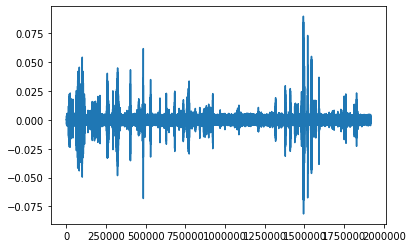

In [18]:
plt.plot(y)

In [19]:
# librosa.effects.split(y) # 
# librosa.effects.trim(y)

# librosa.effects.split(y, top_db=10)

# Igualar amplitudes bajas a 0:
y[(y > (-np.max(y)/5)) & (y < np.max(y)/5)] = 0
y[(y > (-0.05)) & (y < 0.05)] = 0

# noise gate

In [ ]:
plt.plot(np.concatenate([y[18432:20992],y[24064:26624],y[28160:30208],y[62976:65536],
 y[66560:69120],y[70144:83968], y[86016:93696], y[94720:97792], y[98304:102912], y[103936:109056],
y[111104:115200] , y[176640:178688]  , y[198144:200704]]))

In [131]:
channel1 = y
audio_segment = AudioSegment(channel1.tobytes(),frame_rate=rate,
                             sample_width=channel1.dtype.itemsize,channels=1)

In [21]:
from scipy import signal
# Define filter cutoff frequency and degree
b, a = signal.butter(3, 1/10, btype= 'lowpass')
# Apply modeled filter to data
y_filtered = signal.filtfilt(b, a, y)
plt.plot(y)
plt.plot(y_filtered)
plt.legend(["Original","Filtered"])

NameError: name 'y' is not defined

In [35]:
y_filtered = y_filtered.astype("float32")

In [38]:
channel1 = y
audio_segment = AudioSegment(channel1.tobytes(),frame_rate=rate,
                             sample_width=channel1.dtype.itemsize,channels=1)

In [39]:
audio_segment

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

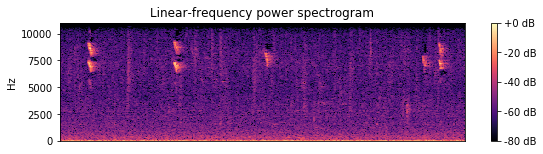

In [85]:
plt.figure(figsize=(20, 10))
import librosa.display
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [ ]:
# from scipy.fftpack import fft
# fft_mod = np.abs(fft(y))
# fft_mod = fft_mod[0:len(fft_mod)//2]
# plt.stem(fft_mod)

In [ ]:
import pandas as pd
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
DF_selected = pd.read_csv('./dataset/birds_spain_selected.csv')
audio = AudioSegment.from_mp3('./dataset/recordings/stage-1/Corvus-corax_308884.mp3')
audio = audio.set_frame_rate(16000)
audioArray = audio.get_array_of_samples()
plt.plot(audioArray)
# audio.export('audio.mp3', format='mp3')
from scipy import signal
# Define filter cutoff frequency and degree:
b, a = signal.butter(3, 1/8, btype= 'low') # 1/10
# Apply modeled filter to data:
audioArray_filtered = signal.filtfilt(b, a, audioArray)
plt.plot(audioArray)
plt.plot(audioArray_filtered)
plt.legend(["Original","Filtered"])
import array
new_sample = array.array('h')
new_sample.fromlist(list(map(int,(samples_filtered*2))))
new_audio = audio._spawn(data=new_sample)
audio
new_audio

In [ ]:
print(len(audio))
print(audio.dBFS)